### I want to implement linear regression from scratch

In some examples people usually implement predicting houses prices
In my case I want to predict car prices according to
- `car mileage`
- `year of car manufacture`
- `car model`
- etc

In [2]:
# importing libs
import numpy as np
import matplotlib.pyplot as plt

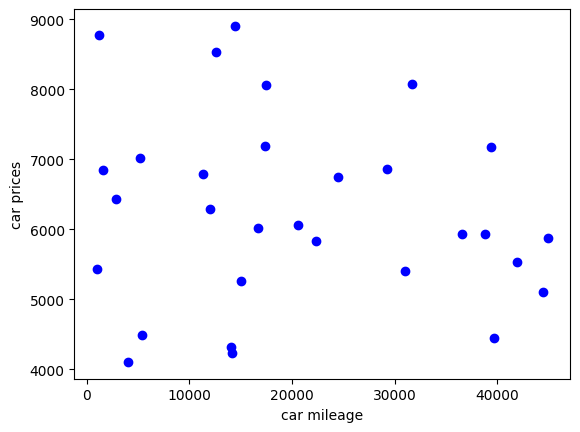

In [7]:
# get data | btw its all random 'cause im lazy
rng = np.random.default_rng(123456)
car_prices = rng.integers(low=4000, high=9000, size=30)
car_mileage = rng.integers(low=100, high=50000, size=30)

plt.plot(car_mileage, car_prices, 'bo')
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

Right now we have arrays `car_mileage` which refers to x (or, feature variable)
and `car_price` which refers to y (or, target variable)

This is called training set (dataset)

We have to move our dataset through learning algorithm which is some function `f` (it is also called `model`).

What will be our function `f` mathematically look like? Let's take a look below

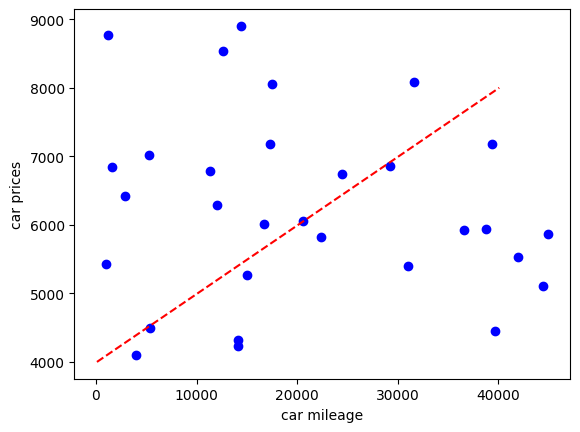

Red line is simple linear function which is kind of mean of values. So we want to pick up such line so it fits the data and we could predict the values

And mathematically it looks like `f(x)=wx + b`

What are `w` and `b` numbers? It is called _parameters_. Also `w` is called _weight_ and `b` is called _bias_

So to pick up best fitting line to our data we have to find values `w` and `b`

### If you are unfamiliar with linear function, this section is for you

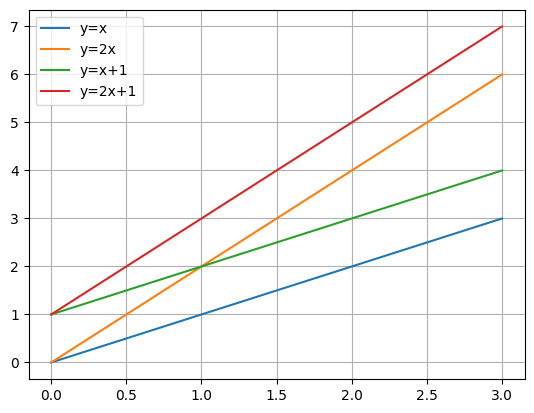

As you can see parameter `w` before `x` is changing slope of a line while `b` set the starting height of a line

So changing `w` and `b` we can find best fitting line for our data. The question is _"How we find these parameters?"_

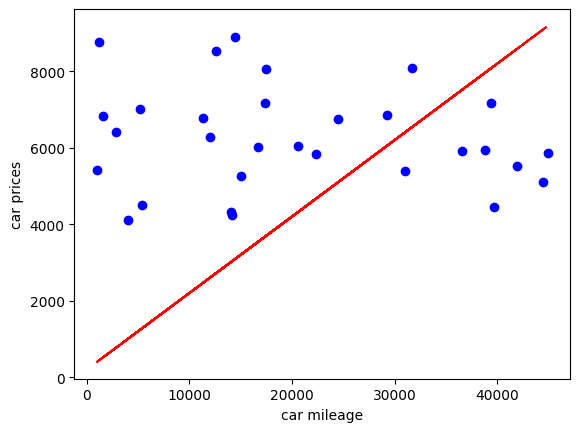

In [39]:
# We can just start guessing values
w, b = 0.2, 200

y_prediction = []

# for every car_mileage we calculate _y_ as a prediction
for x in car_mileage:
    prediction = w*x + b
    y_prediction.append(prediction)

plt.plot(car_mileage, y_prediction, 'r--')
plt.plot(car_mileage, car_prices, 'bo')
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

Seems parameters `0.2 for w` and `200 for b` aren't seems good to predictions

Let's try another parameters

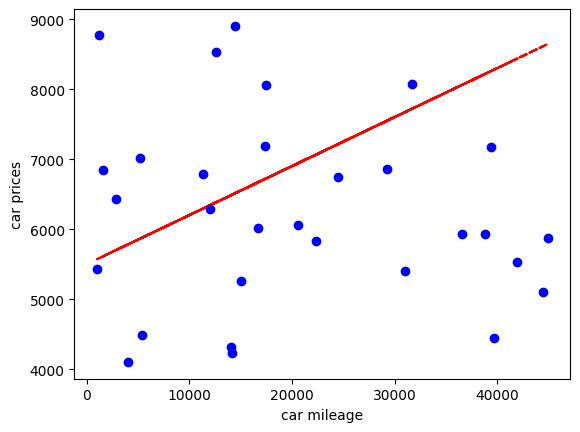

In [46]:
w, b = 0.07, 5500

y_prediction = []

for x in car_mileage:
    prediction = w*x + b
    y_prediction.append(prediction)

plt.plot(car_mileage, y_prediction, 'r--')
plt.plot(car_mileage, car_prices, 'bo')
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

Looks much better. But still incorrect

So we have to learn something new

## Cost function

Imagine simple linear function from 0 to 5

Our prediction linear function will be `2x+1 (w=2, b=1)`

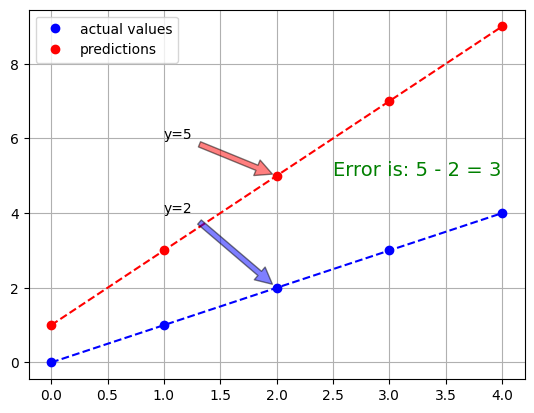

In [79]:
x = np.arange(5)
w, b = 2, 1

plt.plot(x, 'b--')
plt.plot(x, 'bo', label="actual values")
plt.plot(w*x+b, 'r--')
plt.plot(w*x+b, 'ro', label="predictions")
plt.legend()
plt.annotate('y=5', xy=(2, 5), xytext=(1, 6),
             arrowprops=dict(facecolor='red', shrink=0.05, alpha=0.5))
plt.annotate('y=2', xy=(2, 2), xytext=(1, 4),
             arrowprops=dict(facecolor='blue', shrink=0.05, alpha=0.5))
plt.text(2.5, 5, 'Error is: 5 - 2 = 3', color="Green", fontsize=14)
plt.grid(True)
plt.show()

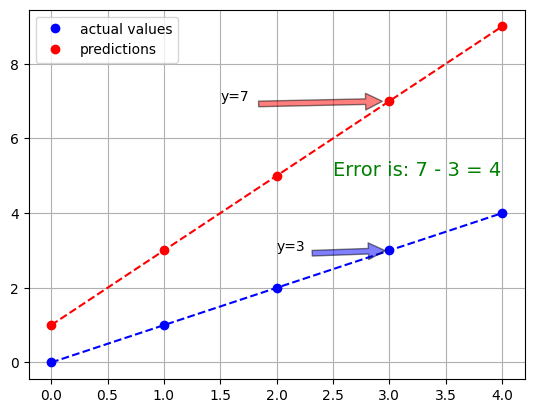

In [83]:
x = np.arange(5)
w, b = 2, 1

plt.plot(x, 'b--')
plt.plot(x, 'bo', label="actual values")
plt.plot(w*x+b, 'r--')
plt.plot(w*x+b, 'ro', label="predictions")
plt.legend()
plt.annotate('y=7', xy=(3, 7), xytext=(1.5, 7),
             arrowprops=dict(facecolor='red', shrink=0.05, alpha=0.5))
plt.annotate('y=3', xy=(3, 3), xytext=(2, 3),
             arrowprops=dict(facecolor='blue', shrink=0.05, alpha=0.5))
plt.text(2.5, 5, 'Error is: 7 - 3 = 4', color="Green", fontsize=14)
plt.grid(True)
plt.show()

To find total errors sum between our predictions and actual data we calculate the sum of errors by substrackting `y` from `y_prediction` for every data point

`(y_prediction_1 - y_1) + (y_prediction_2 - y_2) + ...`

Let's find out total error

In [84]:
array = np.arange(5)
w, b = 2, 1

# implementing linear function f(x)=wx+b
def f(w,b, x):
    return w*x + b

sum_cost = 0
for x in array:
    sum_cost += f(w,b,x) - x # in our case y=x, so i use x

print('Our cost function is: ', sum_cost)

15


Let's tweak our parameters a little bit `w` equals `1` instead of `2`

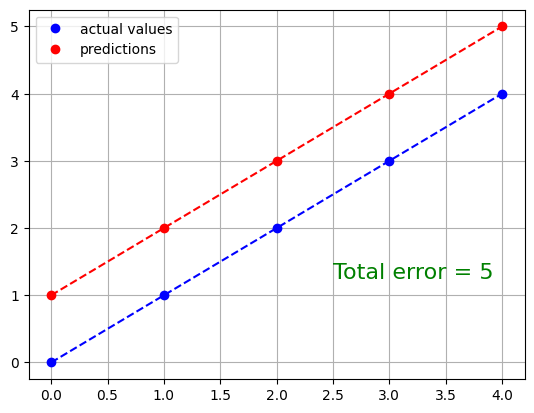

In [97]:
array = np.arange(5)
w, b = 1, 1

# implementing linear function f(x)=wx+b
def f(w,b, x):
    return w*x + b

sum_cost = 0
for x in array:
    sum_cost += f(w,b,x) - x

plt.plot(array, 'b--')
plt.plot(array, 'bo', label="actual values")
plt.plot(w*array+b, 'r--')
plt.plot(w*array+b, 'ro', label="predictions")
plt.legend()
plt.text(2.5, 1.25, f'Total error = {sum_cost}', color="Green", fontsize=16)
plt.grid(True)
plt.show()

As you can see, lines look more similar and total error is much lower (prev=15, now=5)

Let's tweak our parameters again `b` is `-1` instead of `1`

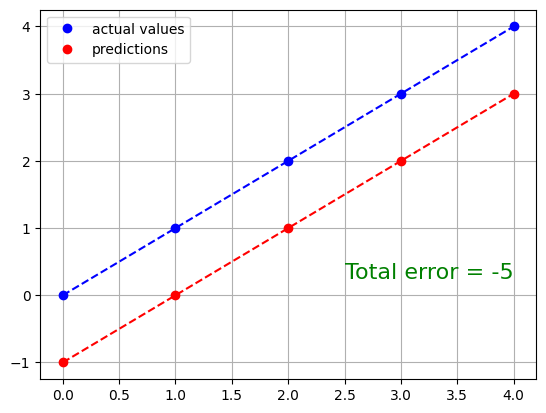

In [105]:
array = np.arange(5)
w, b = 1, -1

# implementing linear function f(x)=wx+b
def f(w,b, x):
    return w*x + b

sum_cost = 0
for x in array:
    sum_cost += f(w,b,x) - x

plt.plot(array, 'b--')
plt.plot(array, 'bo', label="actual values")
plt.plot(w*array+b, 'r--')
plt.plot(w*array+b, 'ro', label="predictions")
plt.legend()
plt.text(2.5, 0.25, f'Total error = {sum_cost}', color="Green", fontsize=16)
plt.grid(True)
plt.show()

Ooops, we got negative error. But look at lines. They are similar as before (they just swaped positions)

That's why we have to square the error

In [103]:
array = np.arange(5)
w, b = 1, -1

# implementing linear function f(x)=wx+b
def f(w,b, x):
    return w*x + b

sum_cost = 0
for x in array:
    sum_cost += (f(w,b,x) - x)**2

print(sum_cost) # 5

5


Alright. Finaly we change our `b` to `0`

In [106]:
array = np.arange(5)
w, b = 1, 0

# implementing linear function f(x)=wx+b
def f(w,b, x):
    return w*x + b

sum_cost = 0
for x in array:
    sum_cost += (f(w,b,x) - x)**2

print(sum_cost) # 0

0


So when our cost function reaches `0` we definitely can say that we taught our linear model predict correct values

To sum up, we'll call our cost function: `Squared error cost function` and final formula is J= $1\over{2m}$ $\sum_{i=1}^{m} (\hat{y}_i-y_i)^2$

Where:
- `m` is total amount of training examples
- $\hat{y}$ is our y_prediction

## Gradient descent

Let's find cost for our data

In [118]:
def cost_function(m, y_pred, y):
    sum = 0
    for i in range(m):
        sum += (y_pred[i] - y[i])**2
    return sum / 2*m

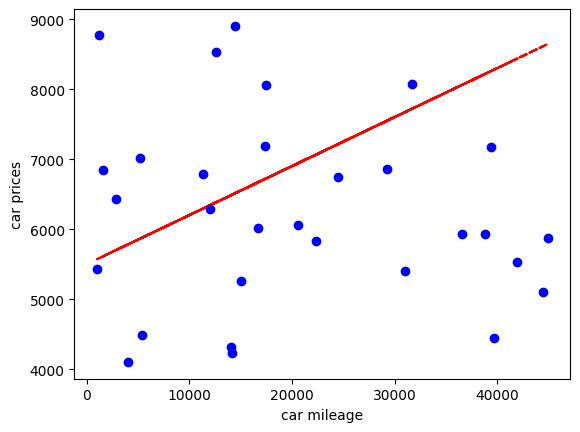

1_577_182_639.7250004


In [126]:
w, b = 0.07, 5500

y_prediction = []

for x in car_mileage:
    prediction = w*x + b
    y_prediction.append(prediction)

m = len(car_mileage)
cost = cost_function(m, y_prediction, car_prices)

plt.plot(car_mileage, y_prediction, 'r--')
plt.plot(car_mileage, car_prices, 'bo')
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

print(f'{cost:_}')

Isn't good. Right? :) Let's tweak parameters

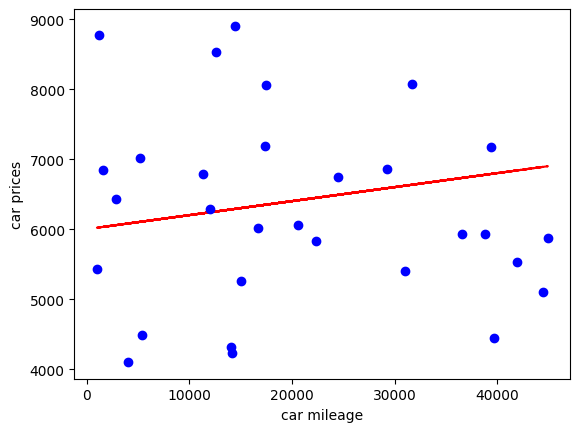

877_101_077.1000004


In [125]:
w, b = 0.02, 6000

y_prediction = []

for x in car_mileage:
    prediction = w*x + b
    y_prediction.append(prediction)

m = len(car_mileage)
cost = cost_function(m, y_prediction, car_prices)

plt.plot(car_mileage, y_prediction, 'r--')
plt.plot(car_mileage, car_prices, 'bo')
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

print(f'{cost:_}')

Looks better. Try again

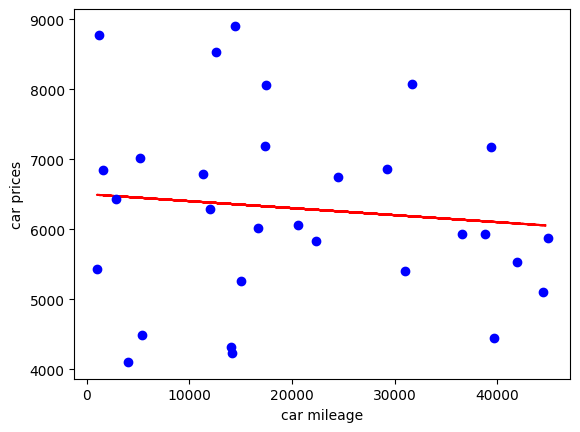

773_382_301.7250001


In [137]:
w, b = -0.01, 6500

y_prediction = []

for x in car_mileage:
    prediction = w*x + b
    y_prediction.append(prediction)

m = len(car_mileage)
cost = cost_function(m, y_prediction, car_prices)

plt.plot(car_mileage, y_prediction, 'r--')
plt.plot(car_mileage, car_prices, 'bo')
plt.xlabel('car mileage')
plt.ylabel('car prices')
plt.show()

print(f'{cost:_}')

Again better. But Im tired guessing numbers. Let's introduce `Gradient descent`